In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_excel('../data/titanic.xls')
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
raw_data.dtypes #항목별 타입을 한꺼번에 보여준다.

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [5]:
raw_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
len(raw_data.columns) #컬럼을 개수

14

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [8]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
raw_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


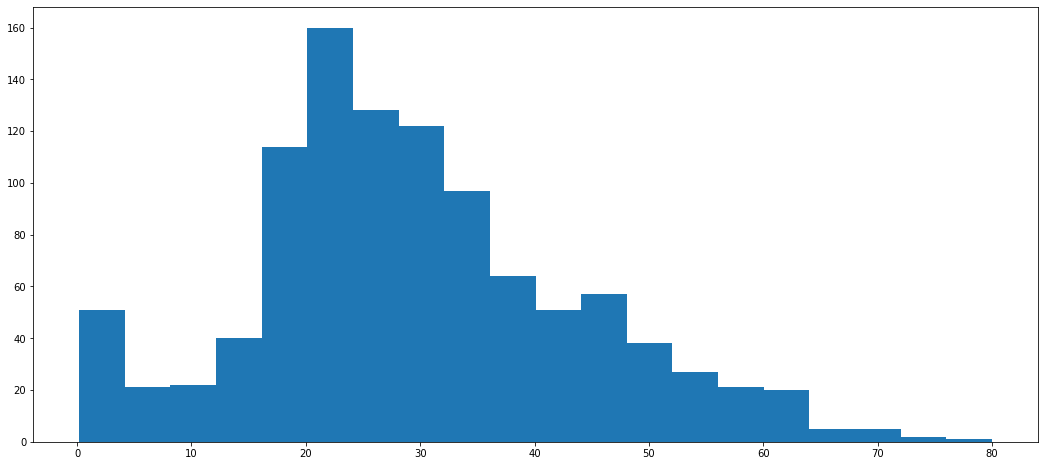

In [10]:
raw_data['age'].hist(bins=20, figsize=(18,8), grid=False);

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


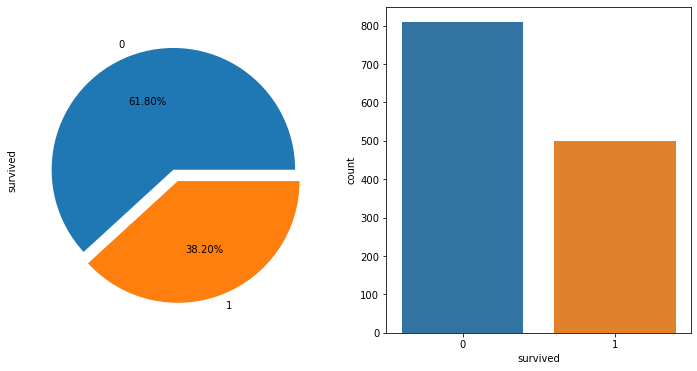

In [11]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
sns.countplot('survived', data=raw_data, ax = ax[1])
plt.show()

In [12]:
raw_data.groupby('pclass').mean()
# 1등급이 높다, 3급이 낮다로 정의함.
# 인사이트: 등급이 높을수록 많이 살았다.
#           나이는 등급이 높을수록 많았다.
#           등급이 낮을 수록 동행한 가족/친족이 많았다.

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [13]:
raw_data.groupby('pclass').count() # 등급별 인원를 세어봤음.
# 인사이트: 3등급이 인원이 제일 많았다.
#           1등급이 보트를 제일 많이 탔다.


,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1,323,323,323,284,323,323,323,323,256,321,201,35,289
2,277,277,277,261,277,277,277,277,23,277,112,31,261
3,709,709,709,501,709,709,709,708,16,709,173,55,195


In [14]:
# 컬럼: 속성, 특성, 항목, 요소=>  feature(피쳐)
# 피쳐가 많은 경우, 
#  1) 항목들을 제거, 
#  2) 항목들이 크게 분석할 것과 상관이 없으면 제거
#               - 수학적 공분산 계산: 숫자가 커지면 공분산이 커짐.
#               - 상관도 계산: 숫자를 -1~1사이로 범위로 정해서 상관관계를 계산함.
# 피쳐들을 선택, 전처리 등: 피쳐엔지니어링(속성공학)

In [15]:
raw_data.corr() #각 항목들의 상관도를 구해줌(-1~1)
#상관관계를 구했는데, 
# 0: 컬럼간에 전혀 상관이 없다.
# 1: 완벽히 상관이 있다.(양)
# -1: 완벽히 상관이 있다.(음)
# - + 0.3: 약간 상관이 있다.
# - + 0.5: 상관이 있는 것 같다.
# - + 0.7: 꽤 큰 상관이 있다.

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [16]:
# 피쳐들간의 상관을 한눈에 알고 싶으면, 그래프를 써라.!
# 상관도를 알 수 있는 그래프: heatmap

In [17]:
raw_data['age_cat'] = pd.cut(raw_data['age'], 
                             bins=[0, 3, 7, 15, 30, 60, 100], 
                             include_lowest = True,
                             labels=['baby', 'children', 'teenage', 
                                     'young', 'adult', 'old']
                            )
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [18]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


In [19]:
raw_data.groupby('age_cat').count()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
age_cat,,,,,,,,,,,,,,
baby,41,41,41,41,41,41,41,41,41,7,41,26,1,25
children,25,25,25,25,25,25,25,25,25,5,25,16,0,14
teenage,49,49,49,49,49,49,49,49,49,5,49,21,3,29
young,494,494,494,494,494,494,494,494,494,82,494,178,43,289
adult,404,404,404,404,404,404,404,404,404,155,403,168,63,302
old,33,33,33,33,33,33,33,33,32,18,32,8,10,26


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


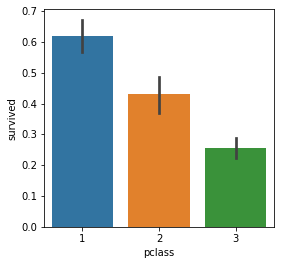

In [20]:
plt.figure(figsize=[14,4])
plt.subplot(131) #1행에 3개를 넣을 예정인데, 아래에 있는 1번째 그래프임.
sns.barplot('pclass', 'survived', data=raw_data)
# age_cat, sex별로 그려보세요.
plt.show()

In [21]:
boat_survivors = raw_data['boat']
boat_survivors

0         2
1        11
2       NaN
3       NaN
4       NaN
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: boat, Length: 1309, dtype: object

In [22]:
raw_data['boat'].notnull()

0        True
1        True
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: boat, Length: 1309, dtype: bool

In [23]:
#raw_data['boat'].notnull() => true/false
#raw_data[raw_data['boat'].notnull()] 
# => []안에 쓴 조건의 결과가 true인 것만 가지고 온다.
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


In [24]:
boat_survivors['boat'].notnull()

0       True
1       True
5       True
6       True
8       True
        ... 
1260    True
1261    True
1277    True
1286    True
1299    True
Name: boat, Length: 486, dtype: bool

In [25]:
#보트 탄 사람들 중 생존자/비생존자를 파이차트와 카운트플롯으로 그려보세요.

In [26]:
raw_data.dtypes

pclass          int64
survived        int64
name           object
sex            object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
age_cat      category
dtype: object

In [27]:
raw_data['name']

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [28]:
raw_data['name'][0]

'Allen, Miss. Elisabeth Walton'

In [29]:
raw_data['name'][0].split(',')

['Allen', ' Miss. Elisabeth Walton']

In [30]:
raw_data['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

In [31]:
raw_data['name'][0].split(',')[1].split('.')

[' Miss', ' Elisabeth Walton']

In [32]:
raw_data['name'][0].split(',')[1].split('.')[0]

' Miss'

In [33]:
raw_data['name'][0].split(',')[1].split('.')[0].strip()

'Miss'

In [34]:
len(raw_data['name'][0].split(',')[1].split('.')[0].strip())

4

In [35]:
def call(x):
    print(x + 100)

In [36]:
call(100) #한줄씩 번역해서 실행

200


In [37]:
# 프로그램 언어 분류: 번역해서 실행방식을 기준
# 한줄씩 번역해서 실행(interpreter, 인터프리터): 인터프리터 언어, 파이썬, R
# 통째로 번역해서 실행(compiler, 컴파일러): 속도가 빠르다. 컴파일 언어, 자바, C++

In [38]:
test = lambda x : x + 2 #x는 입력값, x + 2: 입력값x에 들어있는 값에 2를 더해라.
test(2)

4

In [39]:
map(test, range(5)) #map(처리함수, 브로드캐스팅할 데이터 리스트)
#range(5): [0, 1, 2, 3, 4]

In [40]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [41]:
type(raw_data['name'])

pandas.core.series.Series

In [42]:
conversion_rare = lambda x : x.split(',')[1].split('.')[0].strip()
# list(map(conversion_rare, raw_data['name']))
raw_data['title'] = raw_data['name'].map(conversion_rare)

In [43]:
list1 = list(map(conversion_rare, raw_data['name']))
len(list1)

1309

In [44]:
type(list1)

list

In [45]:
raw_data['title'] = list1

In [46]:
raw_data['title']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [47]:
type(raw_data['title'])

pandas.core.series.Series

In [48]:
# list가 df의 컬럼이 되는 순간 Series로 변환됨.

In [49]:
titles = raw_data['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [50]:
pd.crosstab(raw_data['title'], raw_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [51]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')
raw_data['title']


0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [52]:
Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for x in Rare:
    raw_data['title'] = raw_data['title'].replace(x, 'Rare')

raw_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [53]:
# raw_data.groupby('title').mean() : 모든 컬럼 다 보임.
raw_data[['title', 'survived']].groupby('title').mean() #title, survived만 보임

,survived
title,
Miss,0.678030
Mr,0.162483
Mrs,0.787879
Rare,0.466667


In [54]:
raw_data.groupby('title').mean() 

,pclass,survived,age,sibsp,parch,fare,body
title,,,,,,,
Miss,2.337121,0.678030,21.824335,0.655303,0.496212,42.566747,229.333333
Mr,2.381770,0.162483,32.252151,0.282695,0.159841,24.796185,162.792453
Mrs,1.934343,0.787879,36.918129,0.656566,0.828283,50.655366,129.000000
Rare,2.233333,0.466667,19.204732,1.511111,0.977778,39.302082,124.142857


In [55]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [56]:
tmp = ['f'] * 1309
raw_data2 = raw_data.copy()
raw_data2['sex'] = tmp
raw_data2['sex']

0       f
1       f
2       f
3       f
4       f
       ..
1304    f
1305    f
1306    f
1307    f
1308    f
Name: sex, Length: 1309, dtype: object

In [57]:
tmp2 = []
for x in raw_data['sex']:
    if x == 'female':
        tmp2.append(0)
    elif x == 'male':
        tmp2.append(1)
    else:
        tmp2.append(np.nan)    

In [58]:
len(tmp2)

1309

In [59]:
raw_data['sex'] = tmp2
raw_data['sex'].head()

0    0
1    1
2    0
3    1
4    0
Name: sex, dtype: int64

In [60]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [61]:
# 타입변환 to_frame(), astype('float')
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [62]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   float64 
 2   name       1309 non-null   object  
 3   sex        1309 non-null   float64 
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(8), object(7)
memory usage: 155.0+ KB


In [63]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
dtypes: category(1), float64(8), object(7)
memory usage: 131.8+ KB


In [64]:
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']]
train_pre

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500
...,...,...,...,...,...,...
1301,3.0,1.0,45.5000,0.0,0.0,7.2250
1304,3.0,0.0,14.5000,1.0,0.0,14.4542
1306,3.0,1.0,26.5000,0.0,0.0,7.2250
1307,3.0,1.0,27.0000,0.0,0.0,7.2250


In [65]:
#################### data 준비 끝 ####################

In [66]:
# 공부할 데이터/검증용 데이터 분리

In [67]:
# 머신러닝용 라이브러리: sklearn, 사이킷런
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(train_pre, #데이터프레임의 속성들
                 raw_data[['survived']], #맞추어야할 정답
                 test_size = 0.1, #테스트데이터 10%지정, 훈련데이터 90%할당
                 random_state = 13 #seed값
                )

In [69]:
len(X_train) #훈련용 데이터의 문제

940

In [70]:
len(y_train) #훈련용 데이터의 해답

940

In [71]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [72]:
y_train.head()

,survived
710,0.0
423,0.0
646,1.0
596,1.0
286,0.0


In [73]:
X_train = X_train.reset_index()
X_train

,index,pclass,sex,age,sibsp,parch,fare
0,710,3.0,0.0,37.0,0.0,0.0,7.7500
1,423,2.0,1.0,34.0,0.0,0.0,13.0000
2,646,3.0,0.0,38.0,1.0,5.0,31.3875
3,596,2.0,1.0,31.0,0.0,0.0,13.0000
4,286,1.0,0.0,63.0,1.0,0.0,221.7792
...,...,...,...,...,...,...,...
935,1017,3.0,1.0,21.0,0.0,0.0,7.7750
936,822,3.0,1.0,41.0,0.0,0.0,7.8500
937,83,1.0,0.0,64.0,1.0,1.0,26.5500
938,200,1.0,1.0,46.0,0.0,0.0,75.2417


In [74]:
X_train = X_train.drop(['index'], axis=1)
X_train

,pclass,sex,age,sibsp,parch,fare
0,3.0,0.0,37.0,0.0,0.0,7.7500
1,2.0,1.0,34.0,0.0,0.0,13.0000
2,3.0,0.0,38.0,1.0,5.0,31.3875
3,2.0,1.0,31.0,0.0,0.0,13.0000
4,1.0,0.0,63.0,1.0,0.0,221.7792
...,...,...,...,...,...,...
935,3.0,1.0,21.0,0.0,0.0,7.7750
936,3.0,1.0,41.0,0.0,0.0,7.8500
937,1.0,0.0,64.0,1.0,1.0,26.5500
938,1.0,1.0,46.0,0.0,0.0,75.2417


In [75]:
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [76]:
#!pip install graphviz

In [102]:
from sklearn.tree import DecisionTreeClassifier

# 학습기 객체 생성
# 파라메터를 분석가가 임의로 변경할 수 있음.
# 파라메터를 분서가가 변경가능, 변경불가능
# 분석가가 변경가능한 파라메터를 "하이퍼 파라메터"
tree_clf = DecisionTreeClassifier(max_depth = 6, random_state = 42)
#공부시키기
tree_clf.fit(X_train, y_train) 
#train데이터를 가지고 공부한 점수
tree_clf.score(X_train, y_train)

0.851063829787234

In [95]:
from sklearn.metrics import accuracy_score #채점해주는 라이브러리

y_pred = tree_clf.predict(X_test) #문제를 주고 풀어보라고 함. => 정답 return!

#테스트데이터를 푼 답안과 해답을 비교해서 정확도를 구해보자.
accuracy_score(y_test, y_pred)

0.819047619047619

In [96]:
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

In [97]:
tree_clf.predict_proba([winslet]) #죽을 가능성[0], 살 가능성[1]

array([[0., 1.]])

In [98]:
tree_clf.predict_proba([dicaprio])

array([[1., 0.]])

In [99]:
me = [2., 0., 100., 0., 2., 10.]

In [100]:
tree_clf.predict_proba([me])

array([[1., 0.]])